In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## BASIC INFO ABOUT THE DATA (MATHEMATICAL AND NULL)

In [2]:
df=pd.read_csv("employee_dataset2.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            50 non-null     int64  
 1   Name                   44 non-null     object 
 2   Department             49 non-null     object 
 3   Salary                 47 non-null     float64
 4   Joining_Date           50 non-null     object 
 5   Gender                 39 non-null     object 
 6   Performance_Score      41 non-null     object 
 7   Overtime_Hours         37 non-null     float64
 8   Projects_Handled       38 non-null     float64
 9   Promotion_Last_3Years  42 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 4.0+ KB


,Employee_ID,Salary,Overtime_Hours,Projects_Handled,Promotion_Last_3Years
count,50.00000,47.000000,37.000000,38.000000,42.000000
mean,1025.50000,70617.872340,26.864865,7.263158,0.166667
std,14.57738,27789.299845,14.985478,3.789632,0.377195
min,1001.00000,30854.000000,0.000000,0.000000,0.000000
25%,1013.25000,42781.000000,16.000000,4.000000,0.000000
50%,1025.50000,76717.000000,31.000000,7.500000,0.000000
75%,1037.75000,91718.500000,38.000000,10.000000,0.000000
max,1050.00000,116831.000000,49.000000,14.000000,1.000000


In [3]:
df.head()

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years
0,1001,Employee_0,Finance,98840.0,2016-10-01,NaN,Poor,31.0,NaN,1.0
1,1002,Employee_1,Finance,81005.0,2023-07-02,Other,Excellent,47.0,7.0,0.0
2,1003,Employee_2,Operations,92003.0,2022-06-28,Male,Poor,NaN,4.0,0.0
3,1004,Employee_3,Operations,95318.0,2016-04-04,NaN,Average,0.0,6.0,0.0
4,1005,Employee_4,HR,53664.0,2017-08-12,Other,Poor,38.0,8.0,0.0


In [4]:
df.isnull().sum()

Employee_ID               0
Name                      6
Department                1
Salary                    3
Joining_Date              0
Gender                   11
Performance_Score         9
Overtime_Hours           13
Projects_Handled         12
Promotion_Last_3Years     8
dtype: int64

In [5]:
df.head(10)

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years
0,1001,Employee_0,Finance,98840.0,2016-10-01,NaN,Poor,31.0,NaN,1.0
1,1002,Employee_1,Finance,81005.0,2023-07-02,Other,Excellent,47.0,7.0,0.0
2,1003,Employee_2,Operations,92003.0,2022-06-28,Male,Poor,NaN,4.0,0.0
3,1004,Employee_3,Operations,95318.0,2016-04-04,NaN,Average,0.0,6.0,0.0
4,1005,Employee_4,HR,53664.0,2017-08-12,Other,Poor,38.0,8.0,0.0
5,1006,Employee_5,Marketing,56736.0,2016-04-14,NaN,Good,4.0,13.0,0.0
6,1007,NaN,Finance,30854.0,2017-11-11,Female,Good,2.0,13.0,0.0
7,1008,Employee_7,Finance,37392.0,2022-08-29,Male,Average,15.0,8.0,1.0
8,1009,Employee_8,Sales,76717.0,2019-08-21,Female,Excellent,NaN,10.0,NaN
9,1010,Employee_9,HR,80859.0,2020-09-16,Other,Good,NaN,NaN,0.0


## DATA CLEAING AND PREPARATION

In [6]:
df['Name']=df['Name'].fillna('unknown')

In [7]:
df['Promotion_Last_3Years']=df['Promotion_Last_3Years'].fillna(0)

In [8]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [9]:
df['Overtime_Hours']=df['Overtime_Hours'].fillna(df['Overtime_Hours'].mean())


In [10]:
df['Projects_Handled']=df['Projects_Handled'].fillna(df['Projects_Handled'].mean())

In [11]:
df['Projects_Handled']=df['Projects_Handled'].fillna(df['Projects_Handled'].mean())

In [12]:
df['Department']=df['Department'].fillna('unassigned')

In [13]:
df['Gender'].unique()

array([nan, 'Other', 'Male', 'Female'], dtype=object)

In [14]:
df['Gender']=df['Gender'].fillna("Unknown")

In [15]:
df['Performance_Score'].unique()

array(['Poor', 'Excellent', 'Average', 'Good', nan], dtype=object)

In [16]:
df['Performance_Score']=df['Performance_Score'].fillna('none')

In [17]:
df['Joining_Date']=pd.to_datetime(df['Joining_Date'])

In [18]:
from datetime import datetime

In [19]:
##trying to show you use of datetime

today = pd.to_datetime(datetime.today().date())
currentyr=pd.Timestamp.today().year
currentday=pd.Timestamp.today().date
#time stap works good for year and datetime works for date
today,currentyr,currentday

(Timestamp('2025-08-19 00:00:00'),
 2025,
 <bound method Timestamp.date of Timestamp('2025-08-19 00:02:04.512507')>)

In [20]:
df['Years_at_Company']=(today-df['Joining_Date']).dt.days//365 ## TO EXPLAIN DATETIME

In [21]:
df['Years_at_Company2']=2025-df['Joining_Date'].dt.year


In [22]:
df.head()

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years,Years_at_Company,Years_at_Company2
0,1001,Employee_0,Finance,98840.0,2016-10-01,Unknown,Poor,31.000000,7.263158,1.0,8,9
1,1002,Employee_1,Finance,81005.0,2023-07-02,Other,Excellent,47.000000,7.000000,0.0,2,2
2,1003,Employee_2,Operations,92003.0,2022-06-28,Male,Poor,26.864865,4.000000,0.0,3,3
3,1004,Employee_3,Operations,95318.0,2016-04-04,Unknown,Average,0.000000,6.000000,0.0,9,9
4,1005,Employee_4,HR,53664.0,2017-08-12,Other,Poor,38.000000,8.000000,0.0,8,8


## Exploratory Data Analysis (EDA)

In [23]:
df[['Salary','Overtime_Hours', 'Projects_Handled']].describe()

,Salary,Overtime_Hours,Projects_Handled
count,50.000000,50.000000,50.000000
mean,70617.872340,26.864865,7.263158
std,26925.171649,12.844696,3.293061
min,30854.000000,0.000000,0.000000
25%,43443.250000,23.500000,5.000000
50%,71362.436170,26.864865,7.263158
75%,91392.250000,34.750000,9.000000
max,116831.000000,49.000000,14.000000


In [24]:
AVG=df.groupby('Department')['Salary'].mean()
AVG

Department
Finance       73947.285714
HR            71593.906028
IT            80846.142857
Marketing     55650.714286
Operations    75157.359043
Sales         63335.734043
unassigned    90713.000000
Name: Salary, dtype: float64

In [25]:
pd.crosstab(df['Department'],df['Gender'])

Gender,Female,Male,Other,Unknown
Department,,,,
Finance,2,2,2,1
HR,2,3,4,3
IT,1,1,2,3
Marketing,4,1,1,1
Operations,4,2,1,1
Sales,3,1,3,1
unassigned,0,0,0,1


In [26]:
df.sort_values(by='Overtime_Hours',ascending=False).head(5)

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years,Years_at_Company,Years_at_Company2
43,1044,Employee_43,HR,70617.87234,2023-09-06,Male,Excellent,49.0,6.000000,0.0,1,2
26,1027,Employee_26,HR,38155.00000,2018-04-30,Female,none,48.0,1.000000,0.0,7,7
49,1050,Employee_49,IT,116416.00000,2017-09-07,Male,Excellent,47.0,0.000000,0.0,7,8
1,1002,Employee_1,Finance,81005.00000,2023-07-02,Other,Excellent,47.0,7.000000,0.0,2,2
23,1024,Employee_23,Operations,113763.00000,2017-03-26,Other,Poor,44.0,7.263158,1.0,8,8


In [27]:
## SPECIFIC COL CORR JUST LIKE SPECIFIC COL DESCRIBE()
df[['Salary','Overtime_Hours', 'Projects_Handled']].corr()

,Salary,Overtime_Hours,Projects_Handled
Salary,1.000000,0.187790,-0.245083
Overtime_Hours,0.187790,1.000000,-0.454294
Projects_Handled,-0.245083,-0.454294,1.000000


## BUSINESS INSIGHTS

In [28]:
df[(df['Performance_Score'].isin(['Poor','Average','None']) & (df['Promotion_Last_3Years']==0))]

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years,Years_at_Company,Years_at_Company2
2,1003,Employee_2,Operations,92003.0,2022-06-28,Male,Poor,26.864865,4.000000,0.0,3,3
3,1004,Employee_3,Operations,95318.0,2016-04-04,Unknown,Average,0.000000,6.000000,0.0,9,9
4,1005,Employee_4,HR,53664.0,2017-08-12,Other,Poor,38.000000,8.000000,0.0,8,8
14,1015,Employee_14,IT,97863.0,2020-09-05,Female,Poor,25.000000,3.000000,0.0,4,5
16,1017,Employee_16,Finance,110623.0,2017-03-08,Female,Average,32.000000,7.263158,0.0,8,8
17,1018,Employee_17,HR,72107.0,2021-05-20,Unknown,Poor,36.000000,7.263158,0.0,4,4
22,1023,Employee_22,HR,41411.0,2023-05-26,Other,Poor,0.000000,9.000000,0.0,2,2
25,1026,Employee_25,Operations,41111.0,2016-06-30,Female,Poor,26.864865,12.000000,0.0,9,9
27,1028,Employee_27,Finance,77254.0,2023-07-18,Male,Poor,31.000000,8.000000,0.0,2,2
28,1029,Employee_28,unassigned,90713.0,2015-01-17,Unknown,Average,23.000000,11.000000,0.0,10,10


In [29]:
df.groupby('Department')['Salary'].agg(lambda x:x.max()-x.min())

Department
Finance       79769.0
HR            84631.0
IT            80877.0
Marketing     81830.0
Operations    81206.0
Sales         53867.0
unassigned        0.0
Name: Salary, dtype: float64

In [30]:
df[(df['Projects_Handled']>8) & df['Performance_Score'].isin(['Good','Excellent'])]

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years,Years_at_Company,Years_at_Company2
5,1006,Employee_5,Marketing,56736.0,2016-04-14,Unknown,Good,4.000000,13.0,0.0,9,9
6,1007,unknown,Finance,30854.0,2017-11-11,Female,Good,2.000000,13.0,0.0,7,8
8,1009,Employee_8,Sales,76717.0,2019-08-21,Female,Excellent,26.864865,10.0,0.0,6,6
13,1014,Employee_13,IT,42688.0,2019-12-05,Unknown,Excellent,4.000000,13.0,0.0,5,6
15,1016,Employee_15,IT,95733.0,2015-08-14,Unknown,Good,20.000000,14.0,1.0,10,10
31,1032,Employee_31,Marketing,32049.0,2021-01-14,Other,Good,42.000000,9.0,1.0,4,4
35,1036,Employee_35,Marketing,45151.0,2020-11-16,Male,Excellent,11.000000,12.0,0.0,4,5
39,1040,Employee_39,IT,35539.0,2021-12-19,Other,Good,16.000000,11.0,0.0,3,4
46,1047,Employee_46,HR,68467.0,2018-02-13,Other,Excellent,35.000000,9.0,0.0,7,7


In [31]:
df['promotion']=df.apply(
    lambda row:'yes'
    if (row['Projects_Handled'] >= 8 and row['Performance_Score'] in ["Excellent","Good"]) 
    else 'no',
    axis=1
)

In [32]:
df.head(5)

,Employee_ID,Name,Department,Salary,Joining_Date,Gender,Performance_Score,Overtime_Hours,Projects_Handled,Promotion_Last_3Years,Years_at_Company,Years_at_Company2,promotion
0,1001,Employee_0,Finance,98840.0,2016-10-01,Unknown,Poor,31.000000,7.263158,1.0,8,9,no
1,1002,Employee_1,Finance,81005.0,2023-07-02,Other,Excellent,47.000000,7.000000,0.0,2,2,no
2,1003,Employee_2,Operations,92003.0,2022-06-28,Male,Poor,26.864865,4.000000,0.0,3,3,no
3,1004,Employee_3,Operations,95318.0,2016-04-04,Unknown,Average,0.000000,6.000000,0.0,9,9,no
4,1005,Employee_4,HR,53664.0,2017-08-12,Other,Poor,38.000000,8.000000,0.0,8,8,no


## VISUALIZATION

<Axes: xlabel='Department', ylabel='Salary'>

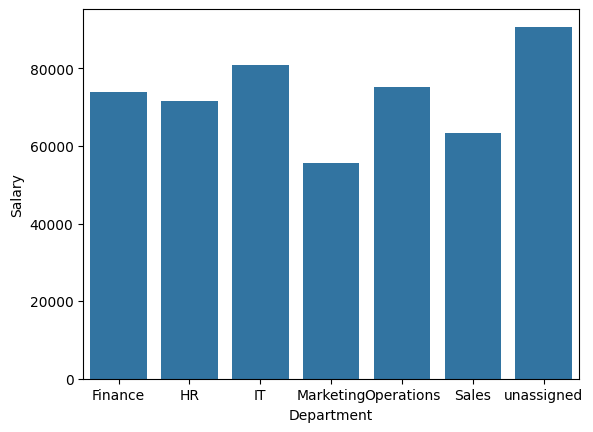

In [33]:
sns.barplot(data=AVG)

<Axes: xlabel='Department', ylabel='Salary'>

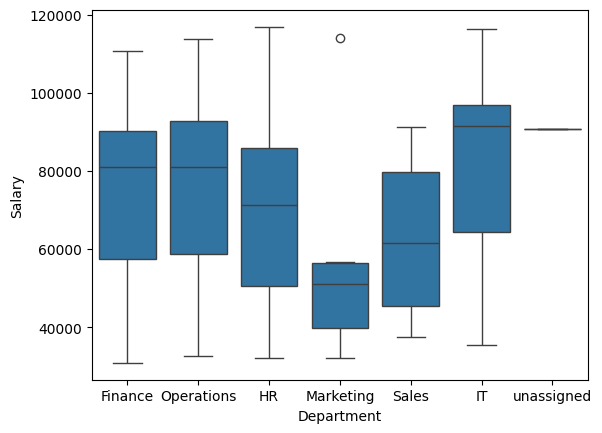

In [34]:
sns.boxplot(data=df,x='Department',y='Salary')

<Axes: xlabel='Gender', ylabel='count'>

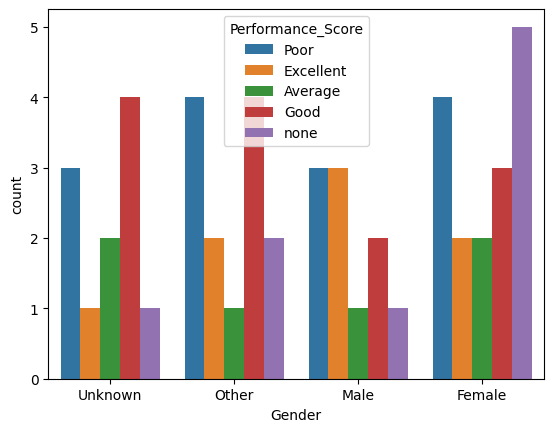

In [35]:
sns.countplot(data=df,x='Gender',hue='Performance_Score')

<Axes: >

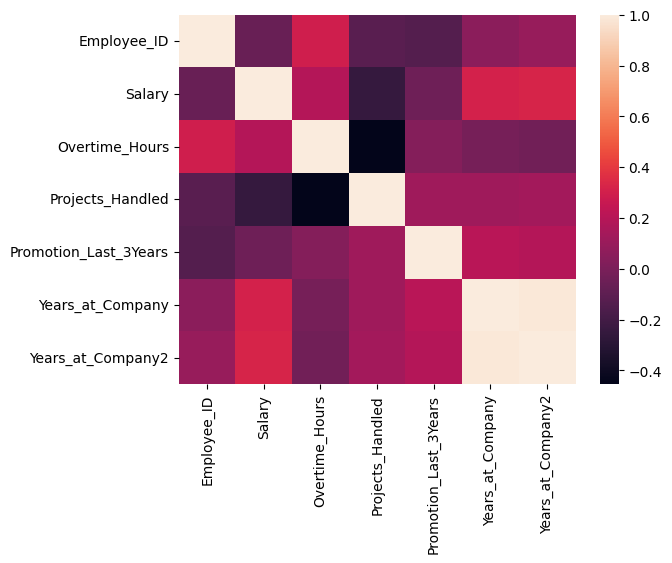

In [36]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Join_Year'>

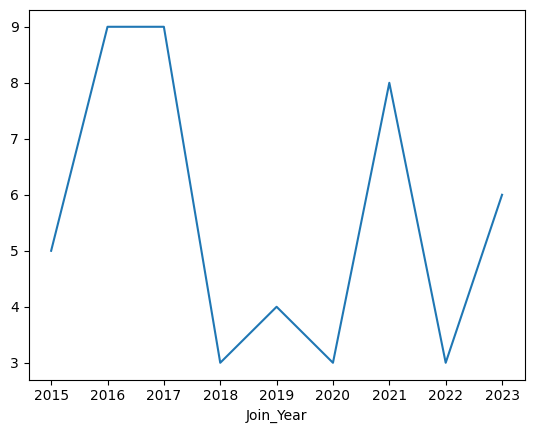

In [37]:
df['Join_Year'] = df['Joining_Date'].dt.year
sns.lineplot(data=df.groupby('Join_Year').size())

In [38]:
df.to_csv("upd_employee_data2.csv",index=False)